# Gender voice recognition - eksploracja danych
Michał Piasecki, Bartosz Siński 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_voice = pd.read_csv("./src/gender_voice_dataset.csv")
df_attr = pd.read_csv("./src/attributes_gender_voice.csv")

# Podstawowe informacje 

In [3]:
pd.options.display.max_colwidth = 200
df_attr

,name,type,description
0,meanfreq,float,mean frequency (in kHz)
1,sd,float,standard deviation of frequency
2,median,float,median frequency (in kHz)
3,Q25,float,first quantile (in kHz)
4,Q75,float,third quantile (in kHz)
5,IQR,float,interquantile range (in kHz)
6,skew,float,skewness (see note in specprop description)
7,kurt,float,kurtosis (see note in specprop description)
8,sp.ent,float,spectral entropy
9,sfm,float,spectral flatness


In [4]:
df_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Jak widzimy, nasz zbiór nie zawiera brakujących danych.

In [1]:
df_voice.describe()

SyntaxError: invalid syntax (<ipython-input-1-7b2687aab1f0>, line 1)

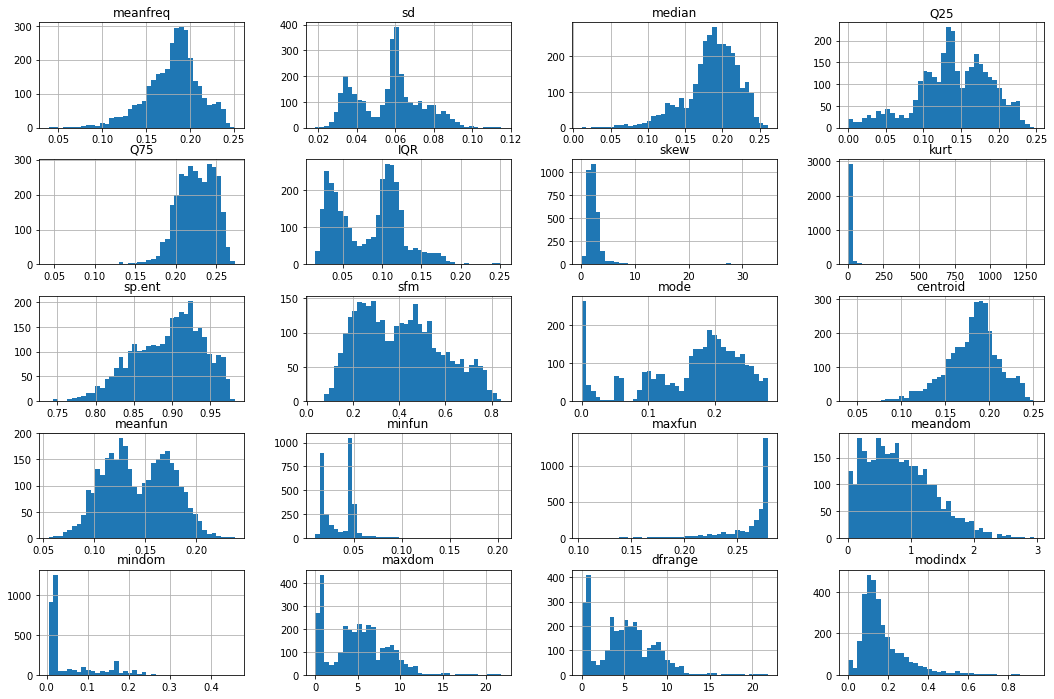

In [6]:
df_voice.drop(["label"], axis=1).hist(bins = 40, figsize=(18, 12))
plt.show()

In [7]:
voice_grouped = df_voice.groupby(by="label")
voice_grouped['meanfreq'].count()

label
female    1584
male      1584
Name: meanfreq, dtype: int64

In [8]:
df_voice=pd.get_dummies(df_voice)

# Korelacje i zależności zmiennych 

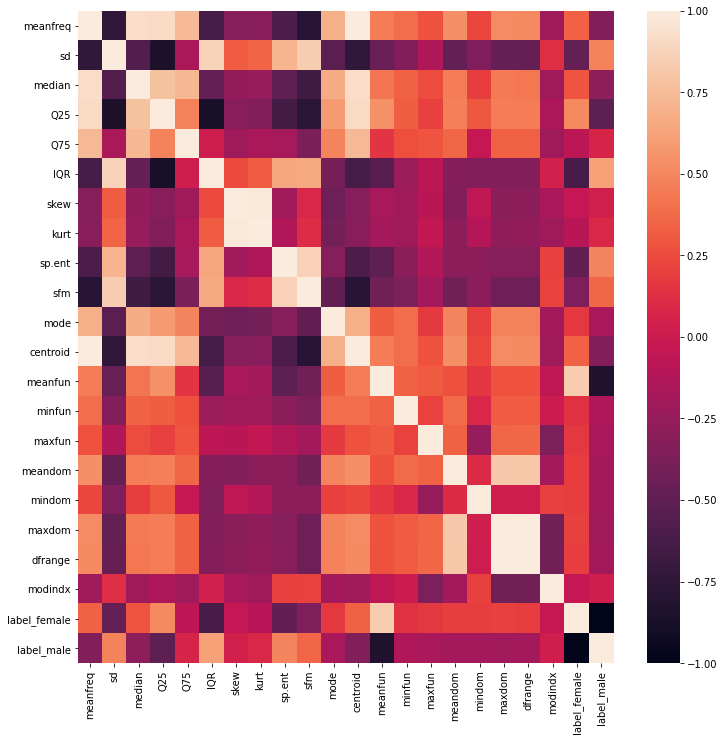

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df_voice.corr())
plt.show()

Przyjrzyjmy się bliżej *meanfreq,median,Q25,Q75,mode,centroid*, które wydają się byc ze soba najlepiej skorelowane. 

In [ ]:
c = df_voice.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so = so.loc[(so < 1) & (so > 0.8)]
so = so[::-1]
pdso = pd.DataFrame(so,columns=['Correlation'])
pdso.drop_duplicates('Correlation')

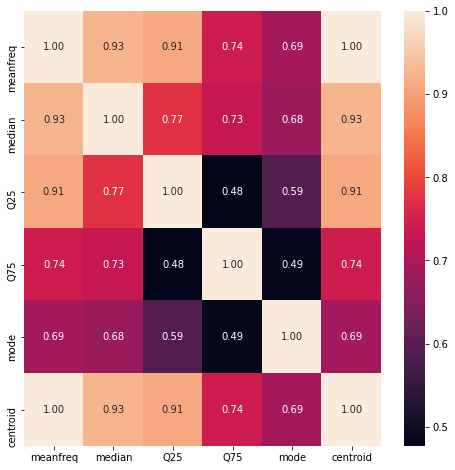

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df_voice[['meanfreq','median','Q25','Q75','mode','centroid']].corr(),annot=True, annot_kws={'size': 10}, fmt='.2f')
plt.show()

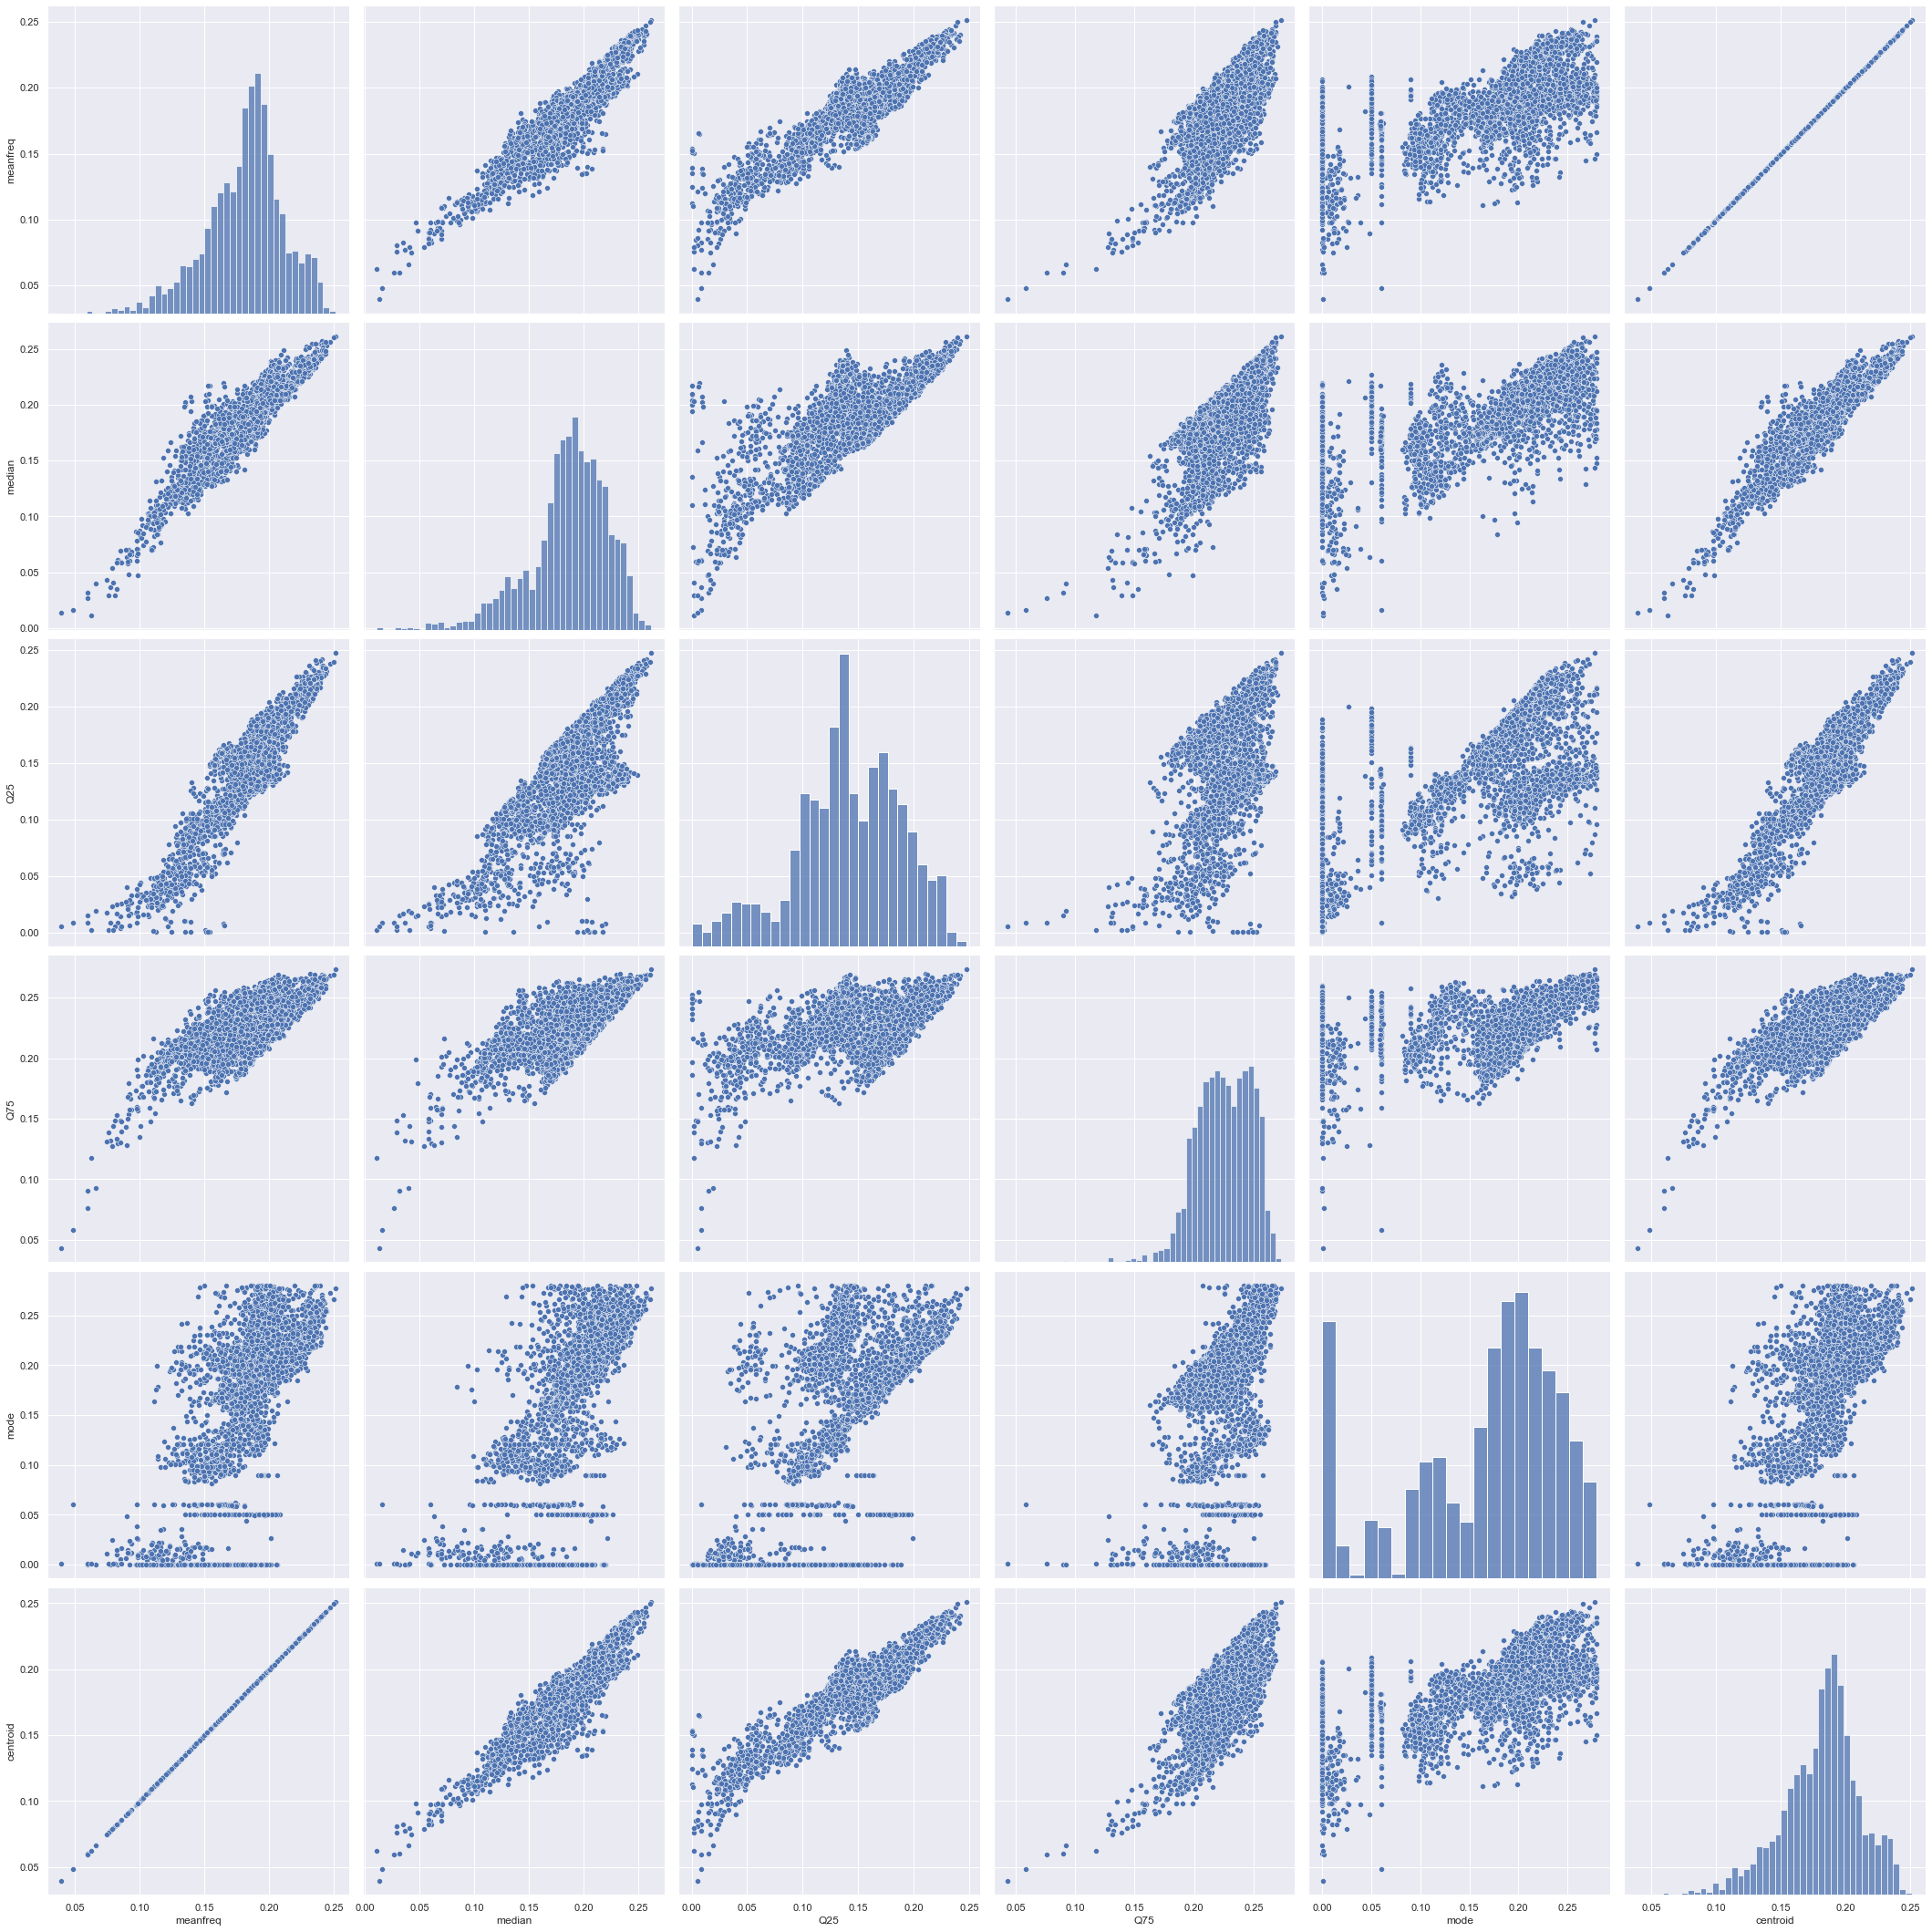

In [11]:
sns.set()
sns.pairplot(df_voice[['meanfreq','median','Q25','Q75','mode','centroid']], height = 5)
plt.show();

Już teraz widzimy, że niektórych zmiennych będziemy mogli nie uwzględniać przy budowie naszego modelu. 

# Zmienne najlepiej skorelowane z targetem

In [12]:
voice_corr = df_voice.corr()[['label_male','label_female']]
voice_corr.iloc[(-voice_corr['label_male'].abs()).argsort()]

,label_male,label_female
label_male,1.000000,-1.000000
label_female,-1.000000,1.000000
meanfun,-0.833921,0.833921
IQR,0.618916,-0.618916
Q25,-0.511455,0.511455
sp.ent,0.490552,-0.490552
sd,0.479539,-0.479539
sfm,0.357499,-0.357499
centroid,-0.337415,0.337415
meanfreq,-0.337415,0.337415


<AxesSubplot:xlabel='label_female', ylabel='sd'>

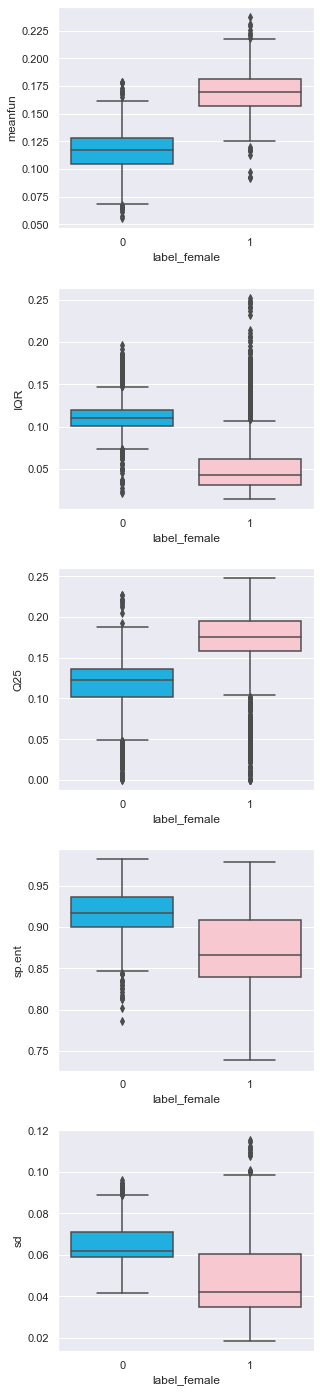

In [13]:
fig, axs = plt.subplots(nrows=5,figsize=(5,20))
fig.tight_layout(pad=3.0)
sns.boxplot(data=df_voice,x="label_female",y="meanfun",ax=axs[0], palette = ["deepskyblue","pink"])
sns.boxplot(data=df_voice,x="label_female",y="IQR",ax=axs[1], palette = ["deepskyblue","pink"])
sns.boxplot(data=df_voice,x="label_female",y="Q25",ax=axs[2], palette = ["deepskyblue","pink"])
sns.boxplot(data=df_voice,x="label_female",y="sp.ent",ax=axs[3], palette = ["deepskyblue","pink"])
sns.boxplot(data=df_voice,x="label_female",y="sd",ax=axs[4], palette = ["deepskyblue","pink"])

# Różnice pomiędzy kobietami i mężczyznami 

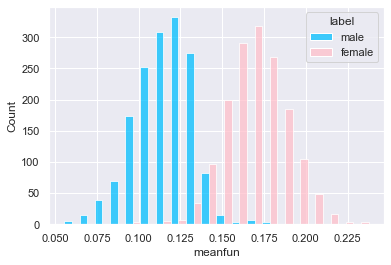

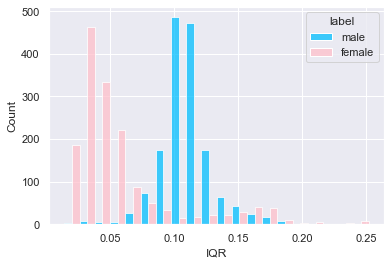

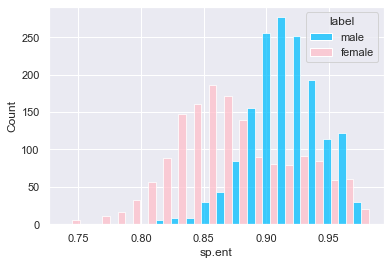

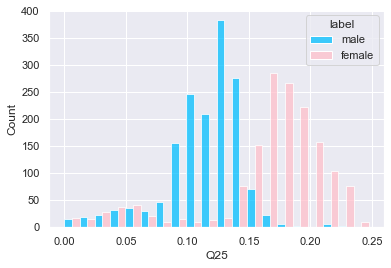

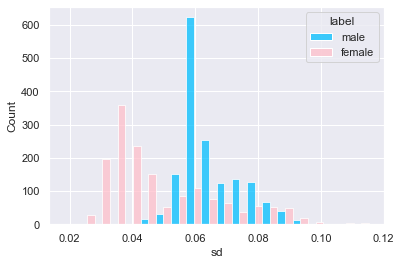

In [14]:
df_voice1 = pd.read_csv("./src/gender_voice_dataset.csv")
females = df_voice1[df_voice1.label == "female"]
males = df_voice1[df_voice1.label == "male"]
columns = df_voice1[['meanfun','IQR','sp.ent','Q25','sd']].columns
columns = columns.tolist()
for column in columns:
    sns.histplot(data = df_voice1, x = column, hue = "label", bins = 20, multiple = "dodge", palette = ["deepskyblue","pink"])
    plt.show()

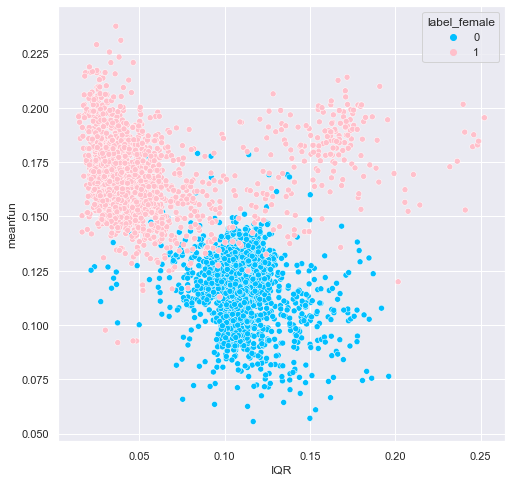

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df_voice,x="IQR",y="meanfun",hue="label_female", palette = ["deepskyblue","pink"])
plt.show()

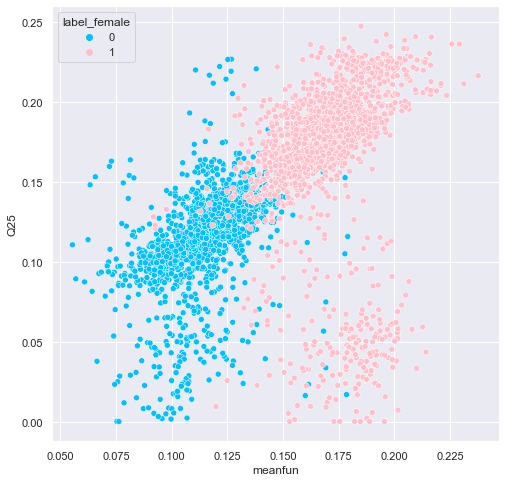

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df_voice,x="meanfun",y="Q25",hue="label_female", palette = ["deepskyblue","pink"])
plt.show()